In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

    id  color   mass  diameter_1  diameter_2  diameter_3
0    1      1  5.760        1.65        1.62        1.66
1    2      1  5.580        1.61        1.62        1.62
2    3      1  5.353        1.60        1.62        1.62
3    4      1  5.629        1.63       16.60        1.65
4    5      1  5.170        1.61        1.58        1.61
5    6      1  5.746        1.64        1.68        1.63
6    7      1  5.127        1.58        1.60        1.59
7    8      1  4.992        1.57        1.55        1.57
8    9      1  5.705        1.65        1.64        1.62
9   10      1  5.578        1.59        1.62        1.60
10  11      1  5.572        1.62        1.61        1.60
11  12      1  5.413        1.63        1.65        1.62
12  13      1  5.776        1.66        1.65        1.67
13  14      1  6.071        1.70        1.70        1.69
14  15      1  5.263        1.61        1.60        1.63
15  16      2  5.653        1.63        1.63        1.61
16  17      2  5.425        1.6

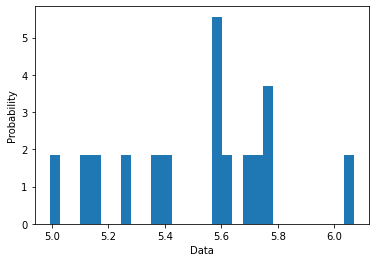

In [4]:
df = pd.read_csv("data_1.csv")
print(df)
plt.hist(df[df["color"] == 1]["mass"], density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

$\sum$

